#_PROBLEMA DE LOS TRES CUERPOS_

# ***Tres cuerpos***

<ipython-input-2-81d64351d220>:74: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-2-81d64351d220>:74: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-2-81d64351d220>:74: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-2-81d64351d220>:74: MatplotlibDeprecatio

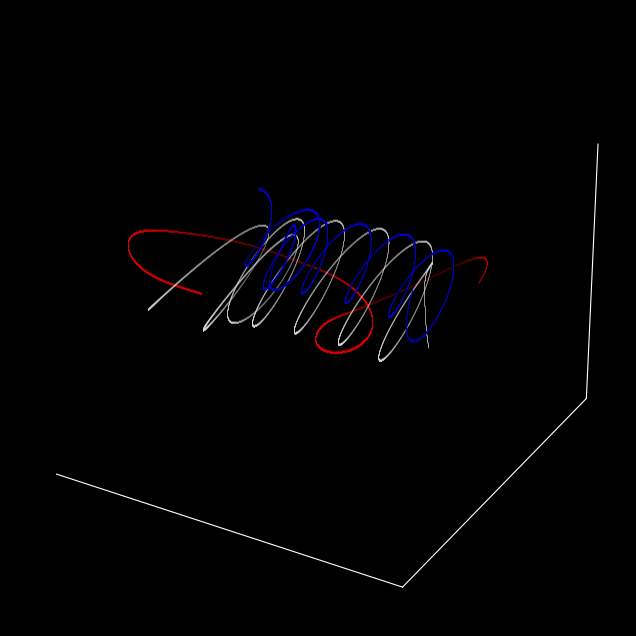

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
plt.style.use('dark_background')

# Masas de los planetas
m_1 = 10
m_2 = 20
m_3 = 30

# Coordenadas iniciales de los planetas
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

p3_start = np.array([10, 10, 12])
v3_start = np.array([3, 0, 0])

def accelerations(p1, p2, p3):
    # Cálculo de las derivadas según las leyes de Newton
    planet_1_dv = -9.8 * m_2 * (p1 - p2) / (np.sqrt(((p1 - p2)**2).sum()) ** 3) - \
                   9.8 * m_3 * (p1 - p3) / (np.sqrt(((p1 - p3)**2).sum()) ** 3)

    planet_2_dv = -9.8 * m_3 * (p2 - p3) / (np.sqrt(((p2 - p3)**2).sum()) ** 3) - \
                   9.8 * m_1 * (p2 - p1) / (np.sqrt(((p2 - p1)**2).sum()) ** 3)

    planet_3_dv = -9.8 * m_1 * (p3 - p1) / (np.sqrt(((p3 - p1)**2).sum()) ** 3) - \
                   9.8 * m_2 * (p3 - p2) / (np.sqrt(((p3 - p2)**2).sum()) ** 3)

    return planet_1_dv, planet_2_dv, planet_3_dv

# Parámetros
delta_t = 0.001
steps = 70000  # Reducido el número de pasos

# Inicializar arrays de trayectoria y velocidad
p1 = np.zeros((steps, 3))
v1 = np.zeros((steps, 3))

p2 = np.zeros((steps, 3))
v2 = np.zeros((steps, 3))

p3 = np.zeros((steps, 3))
v3 = np.zeros((steps, 3))

# Asignar puntos iniciales y velocidades
p1[0], p2[0], p3[0] = p1_start, p2_start, p3_start
v1[0], v2[0], v3[0] = v1_start, v2_start, v3_start

# Evolución del sistema
for i in range(steps - 1):
    dv1, dv2, dv3 = accelerations(p1[i], p2[i], p3[i])

    v1[i + 1] = v1[i] + dv1 * delta_t
    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t

    p1[i + 1] = p1[i] + v1[i] * delta_t
    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t

# Crear la figura y el subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

# Función para inicializar la animación
def init():
    ax.clear()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
    return []

# Función para actualizar la animación en cada frame
def update(frame):
    ax.clear()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
    ax.plot(p1[:frame*100, 0], p1[:frame*100, 1], p1[:frame*100, 2], '^', color='red', lw=0.05, markersize=0.01, alpha=0.5)
    ax.plot(p2[:frame*100, 0], p2[:frame*100, 1], p2[:frame*100, 2], '^', color='white', lw=0.05, markersize=0.01, alpha=0.5)
    ax.plot(p3[:frame*100, 0], p3[:frame*100, 1], p3[:frame*100, 2], '^', color='blue', lw=0.05, markersize=0.01, alpha=0.5)
    return []

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(p1) // 100, init_func=init, blit=True)

# Guardar la animación como un archivo de video
ani.save('three_body_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()


# ***Dos cuerpos***

<ipython-input-3-2c1cc9c3d32a>:57: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-3-2c1cc9c3d32a>:57: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-3-2c1cc9c3d32a>:57: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-3-2c1cc9c3d32a>:57: MatplotlibDeprecatio

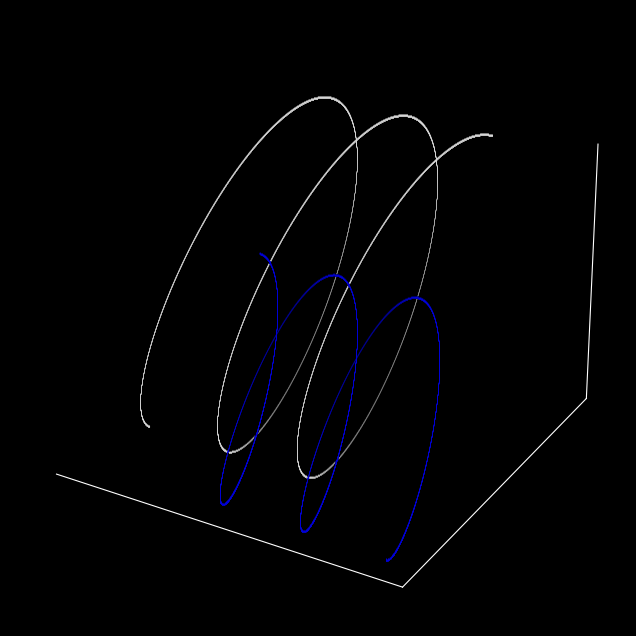

In [ ]:
plt.style.use('dark_background')

# Masas de los planetas
m_1 = 0  # Masa de uno de los planetas es 0
m_2 = 20
m_3 = 30

# Coordenadas iniciales de los planetas
p2_start = np.array([0, 0, 0])
v2_start = np.array([-3, 0, 0])

p3_start = np.array([10, 10, 12])  # Solo necesitamos las coordenadas iniciales de un planeta
v3_start = np.array([3, 0, 0])

def accelerations(p2, p3):
    # Cálculo de las derivadas según las leyes de Newton
    planet_2_dv = -9.8 * m_3 * (p2 - p3) / (np.sqrt(((p2 - p3)**2).sum()) ** 3)

    planet_3_dv = -9.8 * m_2 * (p3 - p2) / (np.sqrt(((p3 - p2)**2).sum()) ** 3)

    return planet_2_dv, planet_3_dv

# Parámetros
delta_t = 0.001
steps = 120000  # Reducido el número de pasos

# Inicializar arrays de trayectoria y velocidad
p2 = np.zeros((steps, 3))
v2 = np.zeros((steps, 3))

p3 = np.zeros((steps, 3))
v3 = np.zeros((steps, 3))

# Asignar puntos iniciales y velocidades
p2[0], p3[0] = p2_start, p3_start
v2[0], v3[0] = v2_start, v3_start

# Evolución del sistema
for i in range(steps - 1):
    dv2, dv3 = accelerations(p2[i], p3[i])

    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t

    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t

# Crear la figura y el subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

# Función para inicializar la animación
def init():
    ax.clear()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
    return []

# Función para actualizar la animación en cada frame
def update(frame):
    ax.clear()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
    ax.plot(p2[:frame*100, 0], p2[:frame*100, 1], p2[:frame*100, 2], '^', color='white', lw=0.05, markersize=0.01, alpha=0.5)
    ax.plot(p3[:frame*100, 0], p3[:frame*100, 1], p3[:frame*100, 2], '^', color='blue', lw=0.05, markersize=0.01, alpha=0.5)
    return []

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(p2) // 100, init_func=init, blit=True)

# Guardar la animación como un archivo de video
ani.save('two_body_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()


**4 cuerpos**

<ipython-input-4-ce1d2200f10d>:86: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-4-ce1d2200f10d>:86: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-4-ce1d2200f10d>:86: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
<ipython-input-4-ce1d2200f10d>:86: MatplotlibDeprecatio

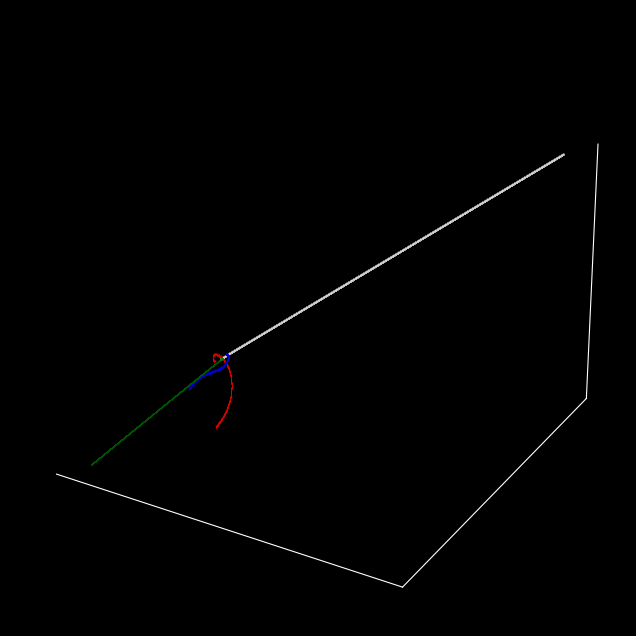

In [ ]:
plt.style.use('dark_background')

# Masas de los planetas
m_1 = 10
m_2 = 20
m_3 = 30
m_4 = 25  # Agregamos un cuarto cuerpo

# Coordenadas iniciales de los planetas
p1_start = np.array([-10, 10, -11])
v1_start = np.array([-3, 0, 0])

p2_start = np.array([0, 0, 0])
v2_start = np.array([0, 0, 0])

p3_start = np.array([10, 10, 12])
v3_start = np.array([3, 0, 0])

p4_start = np.array([5, -10, 5])  # Coordenadas iniciales del cuarto cuerpo
v4_start = np.array([0, 2, 0])   # Velocidad inicial del cuarto cuerpo

def accelerations(p1, p2, p3, p4):
    # Cálculo de las derivadas según las leyes de Newton
    planet_1_dv = -9.8 * (m_2 * (p1 - p2) / np.linalg.norm(p1 - p2)**3 +
                          m_3 * (p1 - p3) / np.linalg.norm(p1 - p3)**3 +
                          m_4 * (p1 - p4) / np.linalg.norm(p1 - p4)**3)

    planet_2_dv = -9.8 * (m_1 * (p2 - p1) / np.linalg.norm(p2 - p1)**3 +
                          m_3 * (p2 - p3) / np.linalg.norm(p2 - p3)**3 +
                          m_4 * (p2 - p4) / np.linalg.norm(p2 - p4)**3)

    planet_3_dv = -9.8 * (m_1 * (p3 - p1) / np.linalg.norm(p3 - p1)**3 +
                          m_2 * (p3 - p2) / np.linalg.norm(p3 - p2)**3 +
                          m_4 * (p3 - p4) / np.linalg.norm(p3 - p4)**3)

    planet_4_dv = -9.8 * (m_1 * (p4 - p1) / np.linalg.norm(p4 - p1)**3 +
                          m_2 * (p4 - p2) / np.linalg.norm(p4 - p2)**3 +
                          m_3 * (p4 - p3) / np.linalg.norm(p4 - p3)**3)

    return planet_1_dv, planet_2_dv, planet_3_dv, planet_4_dv

# Parámetros
delta_t = 0.001
steps = 70000  # Reducido el número de pasos

# Inicializar arrays de trayectoria y velocidad
p1 = np.zeros((steps, 3))
v1 = np.zeros((steps, 3))

p2 = np.zeros((steps, 3))
v2 = np.zeros((steps, 3))

p3 = np.zeros((steps, 3))
v3 = np.zeros((steps, 3))

p4 = np.zeros((steps, 3))
v4 = np.zeros((steps, 3))

# Asignar puntos iniciales y velocidades
p1[0], p2[0], p3[0], p4[0] = p1_start, p2_start, p3_start, p4_start
v1[0], v2[0], v3[0], v4[0] = v1_start, v2_start, v3_start, v4_start

# Evolución del sistema
for i in range(steps - 1):
    dv1, dv2, dv3, dv4 = accelerations(p1[i], p2[i], p3[i], p4[i])

    v1[i + 1] = v1[i] + dv1 * delta_t
    v2[i + 1] = v2[i] + dv2 * delta_t
    v3[i + 1] = v3[i] + dv3 * delta_t
    v4[i + 1] = v4[i] + dv4 * delta_t

    p1[i + 1] = p1[i] + v1[i] * delta_t
    p2[i + 1] = p2[i] + v2[i] * delta_t
    p3[i + 1] = p3[i] + v3[i] * delta_t
    p4[i + 1] = p4[i] + v4[i] * delta_t

# Crear la figura y el subplot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.gca().patch.set_facecolor('black')

# Función para inicializar la animación
def init():
    ax.clear()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
    return []

# Función para actualizar la animación en cada frame
def update(frame):
    ax.clear()
    ax.set_xticks([]), ax.set_yticks([]), ax.set_zticks([])
    ax.w_xaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_yaxis.set_pane_color((0.0, 0.0, 0.0, 1.0)), ax.w_zaxis.set_pane_color((0.0, 0.0, 0.0, 1.0))
    ax.plot(p1[:frame*100, 0], p1[:frame*100, 1], p1[:frame*100, 2], '^', color='red', lw=0.05, markersize=0.01, alpha=0.5)
    ax.plot(p2[:frame*100, 0], p2[:frame*100, 1], p2[:frame*100, 2], '^', color='white', lw=0.05, markersize=0.01, alpha=0.5)
    ax.plot(p3[:frame*100, 0], p3[:frame*100, 1], p3[:frame*100, 2], '^', color='blue', lw=0.05, markersize=0.01, alpha=0.5)
    ax.plot(p4[:frame*100, 0], p4[:frame*100, 1], p4[:frame*100, 2], '^', color='green', lw=0.05, markersize=0.01, alpha=0.5)
    return []

# Crear la animación
ani = FuncAnimation(fig, update, frames=len(p1) // 100, init_func=init, blit=True)

# Guardar la animación como un archivo de video
ani.save('four_body_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()
